Importing all the libraries needed


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

loading breast cancer dataset and Processing

In [60]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [61]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [62]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
df.shape

(569, 30)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [65]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [66]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Scaling and spliting

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.2, random_state=42)

In [68]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [69]:
print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

*Algorithm Implementation *

Logistic Regression

In [70]:
log_reg_model = LogisticRegression()

In [71]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [72]:
log_pred = log_reg_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
print(log_accuracy)

0.9736842105263158


In [73]:
p_log=precision_score(y_test, log_pred)
print(p_log)

0.9722222222222222


In [74]:
re_log=recall_score(y_test, log_pred)
print(re_log)

0.9859154929577465


In [75]:
f1_log=f1_score(y_test, log_pred)
print(f1_log)

0.9790209790209791


Decision Tree Classifier

In [76]:
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, y_train)
dec_pred = dec_tree_model.predict(X_test)
dec_accuracy = accuracy_score(y_test, dec_pred)
print(dec_accuracy)

0.9298245614035088


In [77]:
p_dec=precision_score(y_test, dec_pred)
print(p_dec)

0.9436619718309859


In [78]:
re_dec=recall_score(y_test, dec_pred)
print(re_dec)

0.9436619718309859


In [79]:
f1_dec = f1_score(y_test, dec_pred)
print(f1_dec)

0.9436619718309859


RandomForestClassifier

In [80]:
ran_for_model = RandomForestClassifier()
ran_for_model.fit(X_train, y_train)
ran_pred = ran_for_model.predict(X_test)
ran_accuracy = accuracy_score(y_test, ran_pred)
print(ran_accuracy)

0.9649122807017544


In [81]:
p_ran=precision_score(y_test, ran_pred)
print(p_ran)

0.958904109589041


In [82]:
re_ran=recall_score(y_test, ran_pred)
print(re_ran)

0.9859154929577465


In [83]:
f1_ran=f1_score(y_test, ran_pred)
print(f1_ran)

0.9722222222222222


SVM

In [84]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print(svc_accuracy)

0.9824561403508771


In [85]:
p_svm=precision_score(y_test, svc_pred)
print(p_svm)

0.9726027397260274


In [86]:
re_svm=recall_score(y_test, svc_pred)
print(re_svm)

1.0


In [87]:
f1_svm=f1_score(y_test, svc_pred)
print(f1_svm)

0.9861111111111112


k-Nearest Neighbors

In [88]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

0.9473684210526315


In [89]:
p_knn=precision_score(y_test, knn_pred)
print(p_knn)

0.9577464788732394


In [90]:
re_knn=recall_score(y_test, knn_pred)
print(re_knn)

0.9577464788732394


In [91]:
f1_knn=f1_score(y_test, knn_pred)
print(f1_knn)

0.9577464788732394


Model Comparison


In [92]:
Comparison = {'Logistic Regression': log_accuracy, 'Decision Tree': dec_accuracy, 'Random Forest': ran_accuracy, 'SVM': svc_accuracy, 'k-Nearest Neighbors': knn_accuracy}

In [93]:
for model,accuracy in Comparison.items():
  print(f"{model}:{accuracy:.4f}")

Logistic Regression:0.9737
Decision Tree:0.9298
Random Forest:0.9649
SVM:0.9825
k-Nearest Neighbors:0.9474


In [94]:
camp=max(Comparison,key=Comparison.get)
print(camp)

SVM


In [95]:
camparison_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [96]:
camparison_df.loc[0] = ['Logistic Regression', log_accuracy, p_log, re_log, f1_log]
camparison_df.loc[1] = ['Decision Tree', dec_accuracy, p_dec, re_dec, f1_dec]
camparison_df.loc[2] = ['Random Forest', ran_accuracy, p_ran, re_ran, f1_ran]
camparison_df.loc[3] = ['SVM', svc_accuracy, p_svm, re_svm, f1_svm]
camparison_df.loc[4] = ['k-Nearest Neighbors', knn_accuracy, p_knn, re_knn, f1_knn]

In [97]:
camparison_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.973684,0.972222,0.985915,0.979021
1,Decision Tree,0.929825,0.943662,0.943662,0.943662
2,Random Forest,0.964912,0.958904,0.985915,0.972222
3,SVM,0.982456,0.972603,1.000000,0.986111
4,k-Nearest Neighbors,0.947368,0.957746,0.957746,0.957746


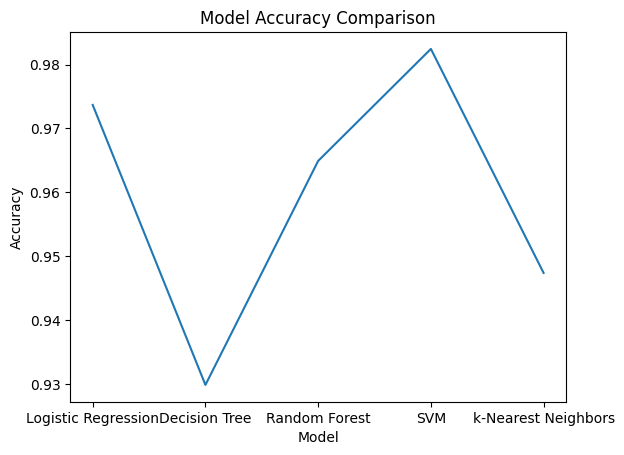

In [98]:
x=camparison_df['Model']
y=camparison_df['Accuracy']
plt.plot(x,y)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

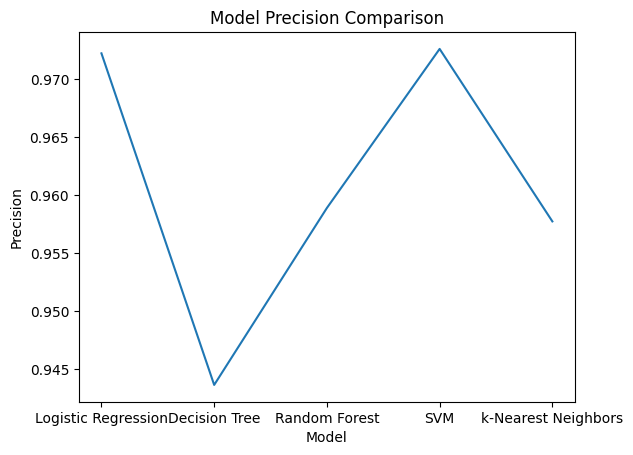

In [99]:
x=camparison_df['Model']
y=camparison_df['Precision']
plt.plot(x,y)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.show()

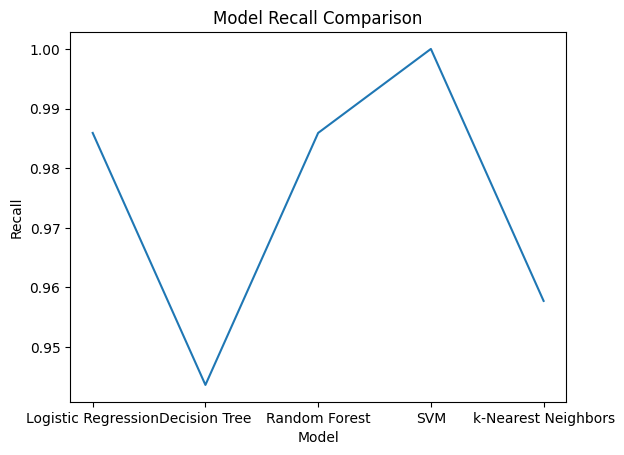

In [100]:
x=camparison_df['Model']
y=camparison_df['Recall']
plt.plot(x,y)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.show()

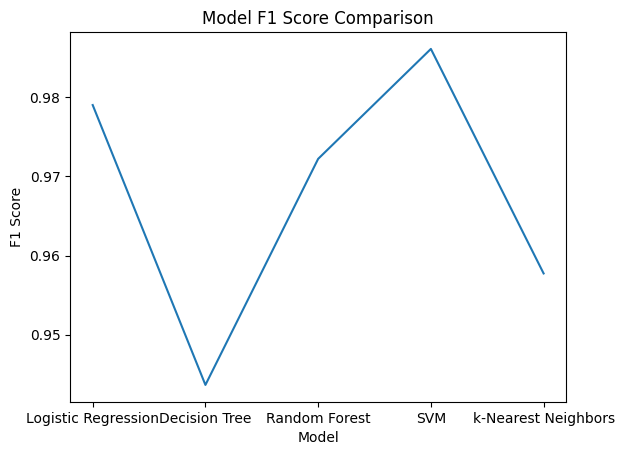

In [101]:
x=camparison_df['Model']
y=camparison_df['F1 Score']
plt.plot(x,y)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.show()